In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("penguins_info.csv")
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/2007,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/2007,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/2007,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/2007,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sample Number,344.0,63.151163,40.430199,1.00000,29.000000,58.000000,95.250000,152.00000
Culmen Length (mm),344.0,43.925000,5.443792,32.10000,39.275000,44.450000,48.500000,59.60000
Culmen Depth (mm),344.0,17.152035,1.969060,13.10000,15.600000,17.300000,18.700000,21.50000
Flipper Length (mm),344.0,200.892442,14.023826,172.00000,190.000000,197.000000,213.000000,231.00000
Body Mass (g),344.0,4200.872093,799.696532,2700.00000,3550.000000,4050.000000,4750.000000,6300.00000
Delta 15 N (o/oo),344.0,8.730086,0.540630,7.63220,8.307415,8.652405,9.136170,10.02544
Delta 13 C (o/oo),344.0,-25.691855,0.779277,-27.01854,-26.285460,-25.833520,-25.089467,-23.78767


In [22]:
df.shape

(344, 17)

In [3]:
catcol=[]
numcol=[]

for i in df.columns:
    if df[i].dtype=="O":
        catcol.append(i)
    else:
        numcol.append(i)

In [4]:
# below it is seen that the mean in highest in body mass upto 4000 while flipper length is 200
df[numcol].describe().T

,count,mean,std,min,25%,50%,75%,max
Sample Number,344.0,63.151163,40.430199,1.00000,29.000000,58.000000,95.250000,152.00000
Culmen Length (mm),342.0,43.921930,5.459584,32.10000,39.225000,44.450000,48.500000,59.60000
Culmen Depth (mm),342.0,17.151170,1.974793,13.10000,15.600000,17.300000,18.700000,21.50000
Flipper Length (mm),342.0,200.915205,14.061714,172.00000,190.000000,197.000000,213.000000,231.00000
Body Mass (g),342.0,4201.754386,801.954536,2700.00000,3550.000000,4050.000000,4750.000000,6300.00000
Delta 15 N (o/oo),330.0,8.733382,0.551770,7.63220,8.299890,8.652405,9.172123,10.02544
Delta 13 C (o/oo),331.0,-25.686292,0.793961,-27.01854,-26.320305,-25.833520,-25.062050,-23.78767


In [6]:
from sklearn.impute import SimpleImputer
imp_median=SimpleImputer(missing_values=np.nan,strategy="median")
imp_mode=SimpleImputer(missing_values=np.nan,strategy="most_frequent")

In [7]:
imp_median

SimpleImputer(strategy='median')

In [8]:
df_num=pd.DataFrame(imp_median.fit_transform(df[numcol]),columns=numcol)
df_cat=pd.DataFrame(imp_mode.fit_transform(df[catcol]),columns=catcol)

In [20]:
df_num

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
0,1.0,39.10,18.7,181.0,3750.0,8.652405,-25.83352
1,2.0,39.50,17.4,186.0,3800.0,8.949560,-24.69454
2,3.0,40.30,18.0,195.0,3250.0,8.368210,-25.33302
3,4.0,44.45,17.3,197.0,4050.0,8.652405,-25.83352
4,5.0,36.70,19.3,193.0,3450.0,8.766510,-25.32426
...,...,...,...,...,...,...,...
339,120.0,44.45,17.3,197.0,4050.0,8.652405,-25.83352
340,121.0,46.80,14.3,215.0,4850.0,8.411510,-26.13832
341,122.0,50.40,15.7,222.0,5750.0,8.301660,-26.04117
342,123.0,45.20,14.8,212.0,5200.0,8.242460,-26.11969


In [9]:
df=pd.concat([df_num,df_cat],axis=1)

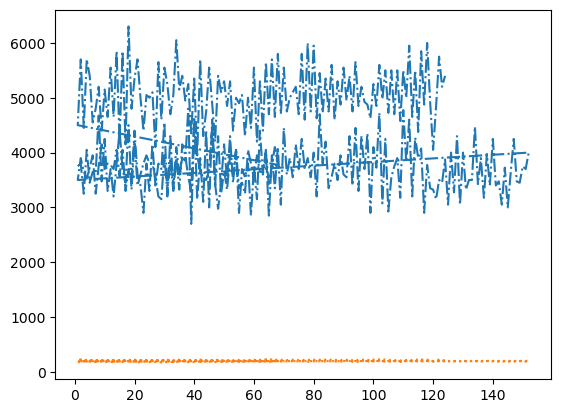

In [10]:
# flipper length is much smaller in plot because of scale of graph
plt.plot(df["Sample Number"],df["Body Mass (g)"],label="line1",linestyle="-.")
plt.plot(df["Sample Number"],df["Flipper Length (mm)"],label="line2",linestyle=":")
plt.plot();

# MinMax Scaling/ Normalization

In [11]:
# we get a numpy array instead on doing the below lines of code
# so we need to convert back inti dataframe
from sklearn.preprocessing import MinMaxScaler
MinMaxscaler=MinMaxScaler()
MinMax=MinMaxscaler.fit_transform(df[numcol])
print(MinMax)

[[0.         0.25454545 0.66666667 ... 0.29166667 0.42628612 0.36678046]
 [0.00662252 0.26909091 0.51190476 ... 0.30555556 0.55045044 0.7193109 ]
 [0.01324503 0.29818182 0.58333333 ... 0.15277778 0.30753706 0.5216923 ]
 ...
 [0.8013245  0.66545455 0.30952381 ... 0.84722222 0.27972957 0.30250985]
 [0.80794702 0.47636364 0.20238095 ... 0.69444444 0.25499323 0.2782068 ]
 [0.81456954 0.64727273 0.35714286 ... 0.75       0.30573616 0.2671819 ]]


In [12]:
df[numcol]

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
0,1.0,39.10,18.7,181.0,3750.0,8.652405,-25.83352
1,2.0,39.50,17.4,186.0,3800.0,8.949560,-24.69454
2,3.0,40.30,18.0,195.0,3250.0,8.368210,-25.33302
3,4.0,44.45,17.3,197.0,4050.0,8.652405,-25.83352
4,5.0,36.70,19.3,193.0,3450.0,8.766510,-25.32426
...,...,...,...,...,...,...,...
339,120.0,44.45,17.3,197.0,4050.0,8.652405,-25.83352
340,121.0,46.80,14.3,215.0,4850.0,8.411510,-26.13832
341,122.0,50.40,15.7,222.0,5750.0,8.301660,-26.04117
342,123.0,45.20,14.8,212.0,5200.0,8.242460,-26.11969


In [13]:
minMaxDF=pd.DataFrame(MinMax,columns=numcol)
minMaxDF

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0.000000,0.254545,0.666667,0.152542,0.291667,0.426286,0.366780
1,0.006623,0.269091,0.511905,0.237288,0.305556,0.550450,0.719311
2,0.013245,0.298182,0.583333,0.389831,0.152778,0.307537,0.521692
3,0.019868,0.449091,0.500000,0.423729,0.375000,0.426286,0.366780
4,0.026490,0.167273,0.738095,0.355932,0.208333,0.473964,0.524404
...,...,...,...,...,...,...,...
339,0.788079,0.449091,0.500000,0.423729,0.375000,0.426286,0.366780
340,0.794702,0.534545,0.142857,0.728814,0.597222,0.325630,0.272441
341,0.801325,0.665455,0.309524,0.847458,0.847222,0.279730,0.302510
342,0.807947,0.476364,0.202381,0.677966,0.694444,0.254993,0.278207


In [14]:
# we see values will be between 0 and 1
# min for all is 0 and max for all is 1
minMaxDF.describe().T

,count,mean,std,min,25%,50%,75%,max
Sample Number,344.0,0.411597,0.267750,0.0,0.185430,0.377483,0.624172,1.0
Culmen Length (mm),344.0,0.430000,0.197956,0.0,0.260909,0.449091,0.596364,1.0
Culmen Depth (mm),344.0,0.482385,0.234412,0.0,0.297619,0.500000,0.666667,1.0
Flipper Length (mm),344.0,0.489702,0.237692,0.0,0.305085,0.423729,0.694915,1.0
Body Mass (g),344.0,0.416909,0.222138,0.0,0.236111,0.375000,0.569444,1.0
Delta 15 N (o/oo),344.0,0.458745,0.225899,0.0,0.282134,0.426286,0.628424,1.0
Delta 13 C (o/oo),344.0,0.410628,0.241197,0.0,0.226899,0.366780,0.597075,1.0


In [15]:
df[numcol].describe().T

,count,mean,std,min,25%,50%,75%,max
Sample Number,344.0,63.151163,40.430199,1.00000,29.000000,58.000000,95.250000,152.00000
Culmen Length (mm),344.0,43.925000,5.443792,32.10000,39.275000,44.450000,48.500000,59.60000
Culmen Depth (mm),344.0,17.152035,1.969060,13.10000,15.600000,17.300000,18.700000,21.50000
Flipper Length (mm),344.0,200.892442,14.023826,172.00000,190.000000,197.000000,213.000000,231.00000
Body Mass (g),344.0,4200.872093,799.696532,2700.00000,3550.000000,4050.000000,4750.000000,6300.00000
Delta 15 N (o/oo),344.0,8.730086,0.540630,7.63220,8.307415,8.652405,9.136170,10.02544
Delta 13 C (o/oo),344.0,-25.691855,0.779277,-27.01854,-26.285460,-25.833520,-25.089467,-23.78767


# Standardization

In [16]:
from sklearn.preprocessing import StandardScaler
stdscaler=StandardScaler()
stdscaled=stdscaler.fit_transform(df[numcol])
print(stdscaled)

[[-1.53948528 -0.88762183  0.78728939 ... -0.56462526 -0.14389564
  -0.18205451]
 [-1.51471526 -0.8140366   0.12611415 ... -0.50201047  0.40655088
   1.28165945]
 [-1.48994525 -0.66686614  0.43127195 ... -1.1907732  -0.67033521
   0.46114277]
 ...
 [ 1.45768662  1.1911609  -0.73849962 ...  1.93996648 -0.79361167
  -0.44890748]
 [ 1.48245664  0.23455292 -1.19623632 ...  1.25120375 -0.90327307
  -0.54981428]
 [ 1.50722666  1.09917936 -0.53506109 ...  1.50166293 -0.678319
  -0.59558988]]


In [17]:
# converting above numpy array to dtaframe
stdscaledDF=pd.DataFrame(stdscaled,columns=numcol)
stdscaledDF

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
0,-1.539485,-0.887622,0.787289,-1.420541,-0.564625,-0.143896,-0.182055
1,-1.514715,-0.814037,0.126114,-1.063485,-0.502010,0.406551,1.281659
2,-1.489945,-0.666866,0.431272,-0.420786,-1.190773,-0.670335,0.461143
3,-1.465175,0.096581,0.075255,-0.277964,-0.188936,-0.143896,-0.182055
4,-1.440405,-1.329133,1.092447,-0.563608,-0.940314,0.067471,0.472400
...,...,...,...,...,...,...,...
339,1.408147,0.096581,0.075255,-0.277964,-0.188936,-0.143896,-0.182055
340,1.432917,0.528894,-1.450534,1.007436,0.812900,-0.590127,-0.573756
341,1.457687,1.191161,-0.738500,1.507314,1.939966,-0.793612,-0.448907
342,1.482457,0.234553,-1.196236,0.793203,1.251204,-0.903273,-0.549814


In [18]:
# mean for all is close to 0 and std for every is 1
stdscaledDF.describe().T

,count,mean,std,min,25%,50%,75%,max
Sample Number,344.0,0.000000e+00,1.001457,-1.539485,-0.845925,-0.127594,0.795089,2.200787
Culmen Length (mm),344.0,-7.435912e-16,1.001457,-2.175363,-0.855428,0.096581,0.841631,2.883621
Culmen Depth (mm),344.0,2.891744e-16,1.001457,-2.060850,-0.789359,0.075255,0.787289,2.211359
Flipper Length (mm),344.0,2.891744e-16,1.001457,-2.063241,-0.777841,-0.277964,0.864614,2.150013
Body Mass (g),344.0,8.262125e-17,1.001457,-1.879536,-0.815084,-0.188936,0.687671,2.628729
Delta 15 N (o/oo),344.0,1.487182e-15,1.001457,-2.033712,-0.782951,-0.143896,0.752225,2.399499
Delta 13 C (o/oo),344.0,-6.800762e-15,1.001457,-1.704935,-0.762847,-0.182055,0.774134,2.447087


In [19]:
df[numcol].describe().T

,count,mean,std,min,25%,50%,75%,max
Sample Number,344.0,63.151163,40.430199,1.00000,29.000000,58.000000,95.250000,152.00000
Culmen Length (mm),344.0,43.925000,5.443792,32.10000,39.275000,44.450000,48.500000,59.60000
Culmen Depth (mm),344.0,17.152035,1.969060,13.10000,15.600000,17.300000,18.700000,21.50000
Flipper Length (mm),344.0,200.892442,14.023826,172.00000,190.000000,197.000000,213.000000,231.00000
Body Mass (g),344.0,4200.872093,799.696532,2700.00000,3550.000000,4050.000000,4750.000000,6300.00000
Delta 15 N (o/oo),344.0,8.730086,0.540630,7.63220,8.307415,8.652405,9.136170,10.02544
Delta 13 C (o/oo),344.0,-25.691855,0.779277,-27.01854,-26.285460,-25.833520,-25.089467,-23.78767
